Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

import warnings

warnings.filterwarnings('ignore')

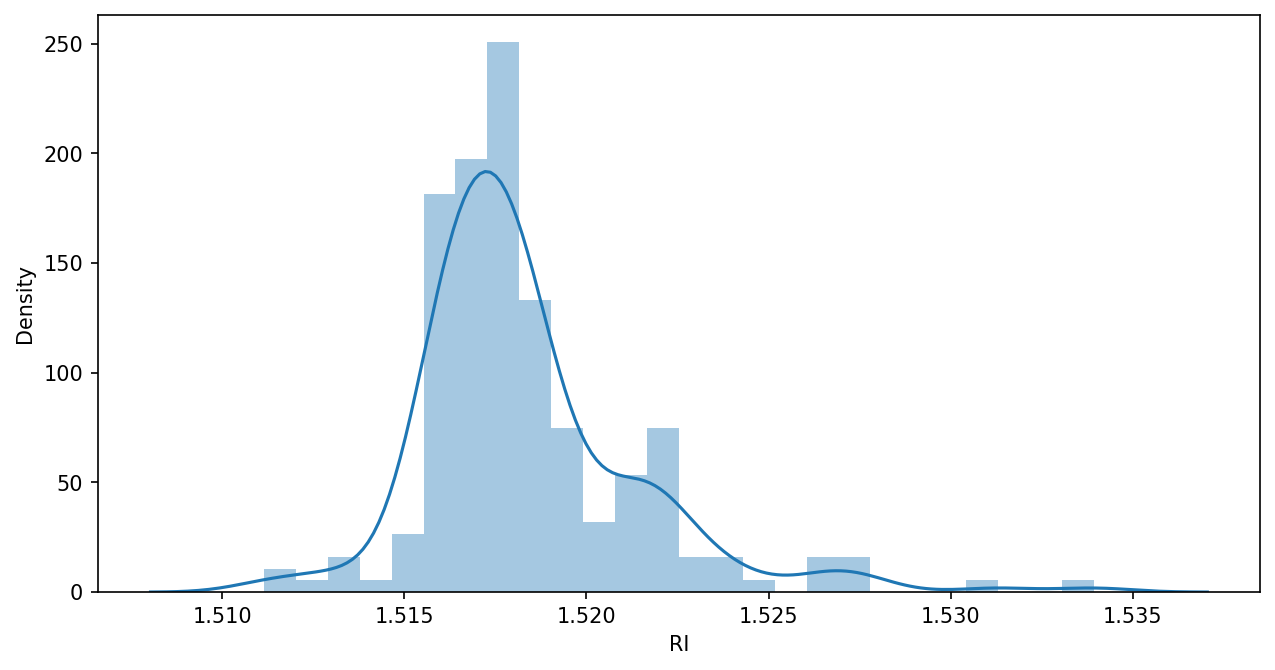

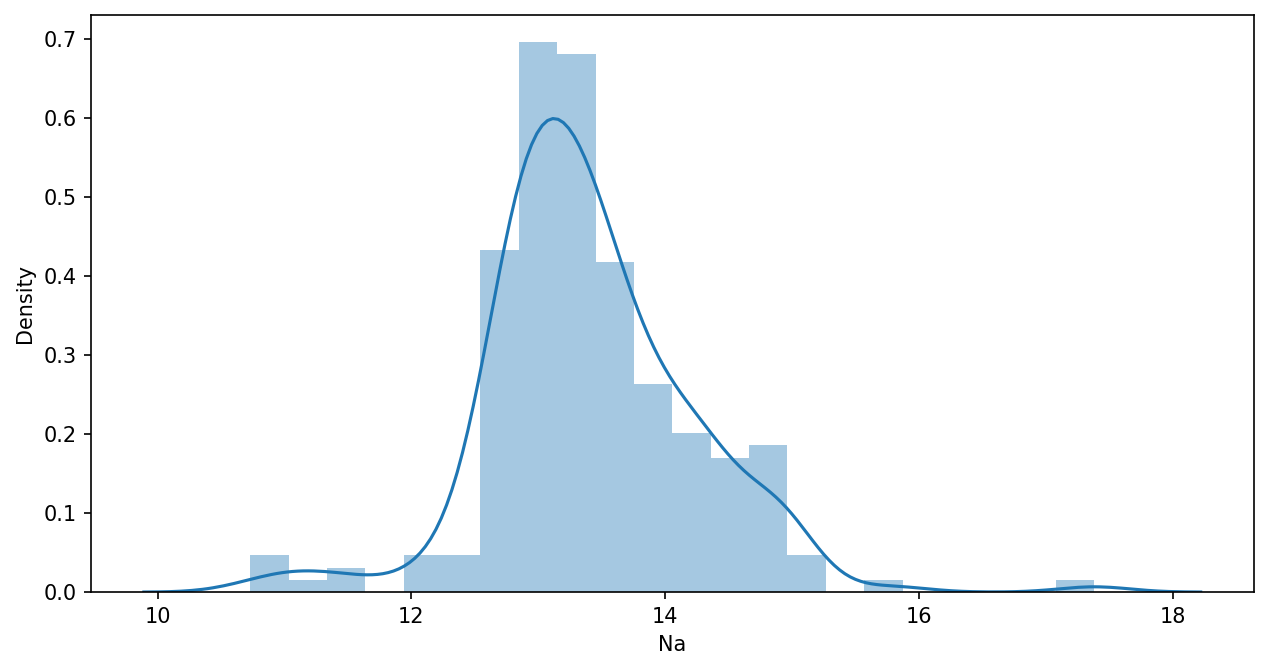

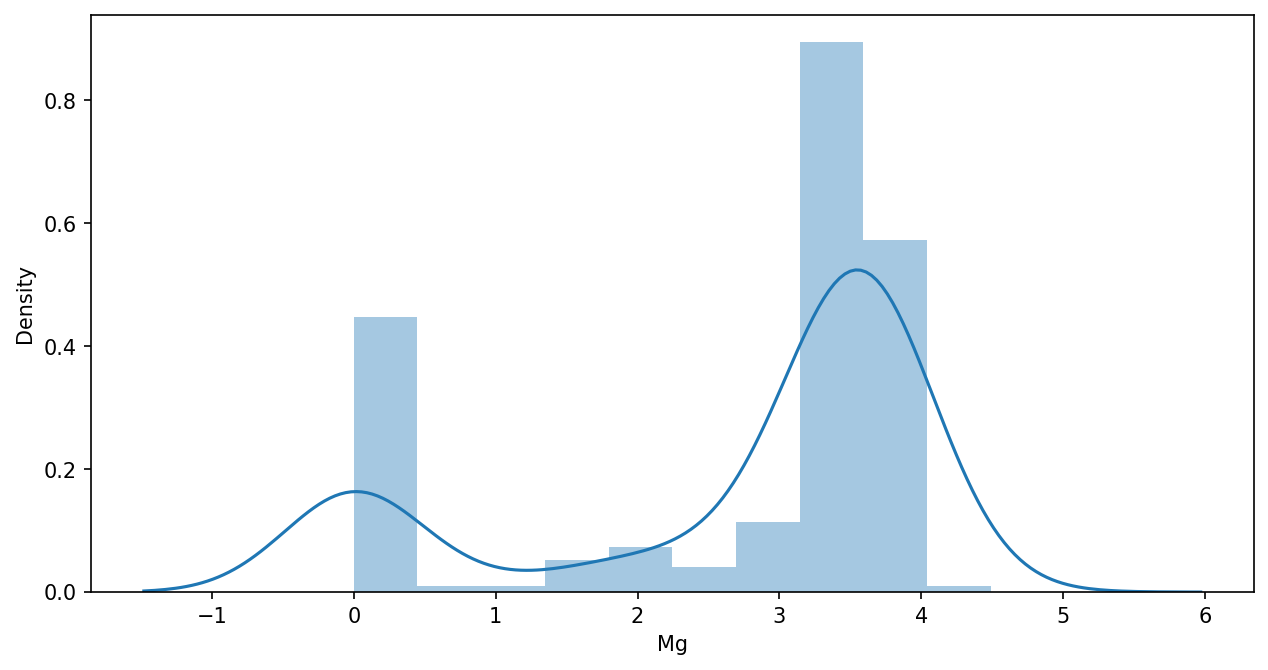

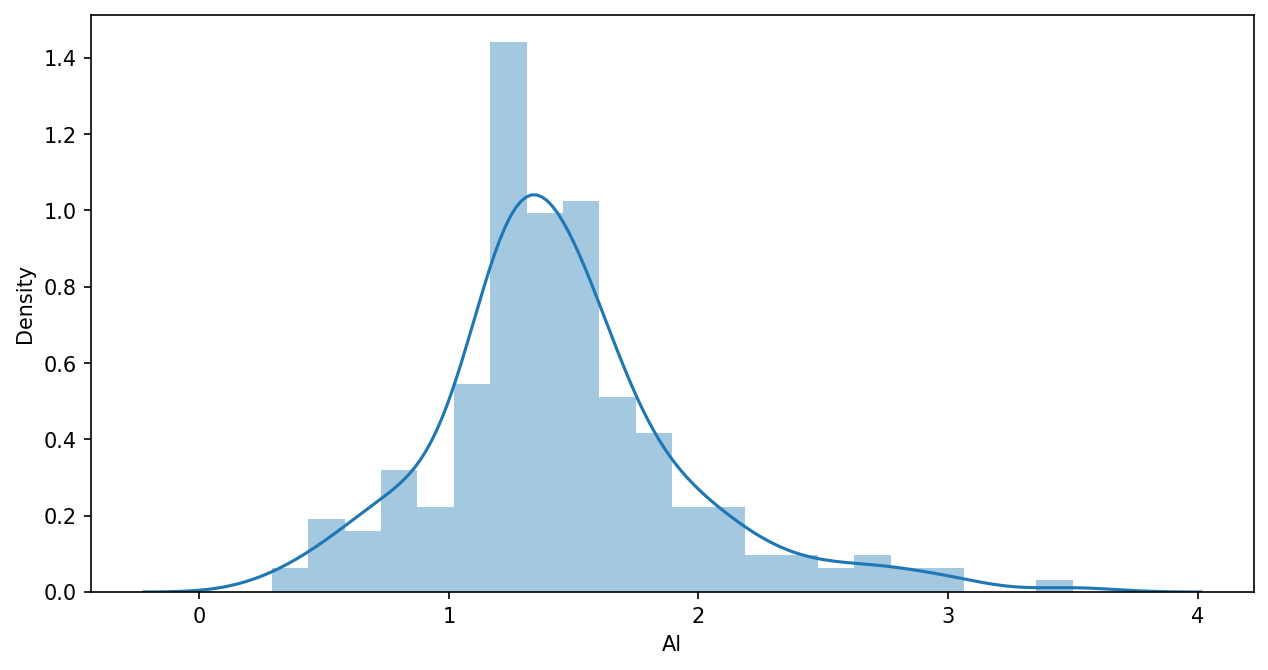

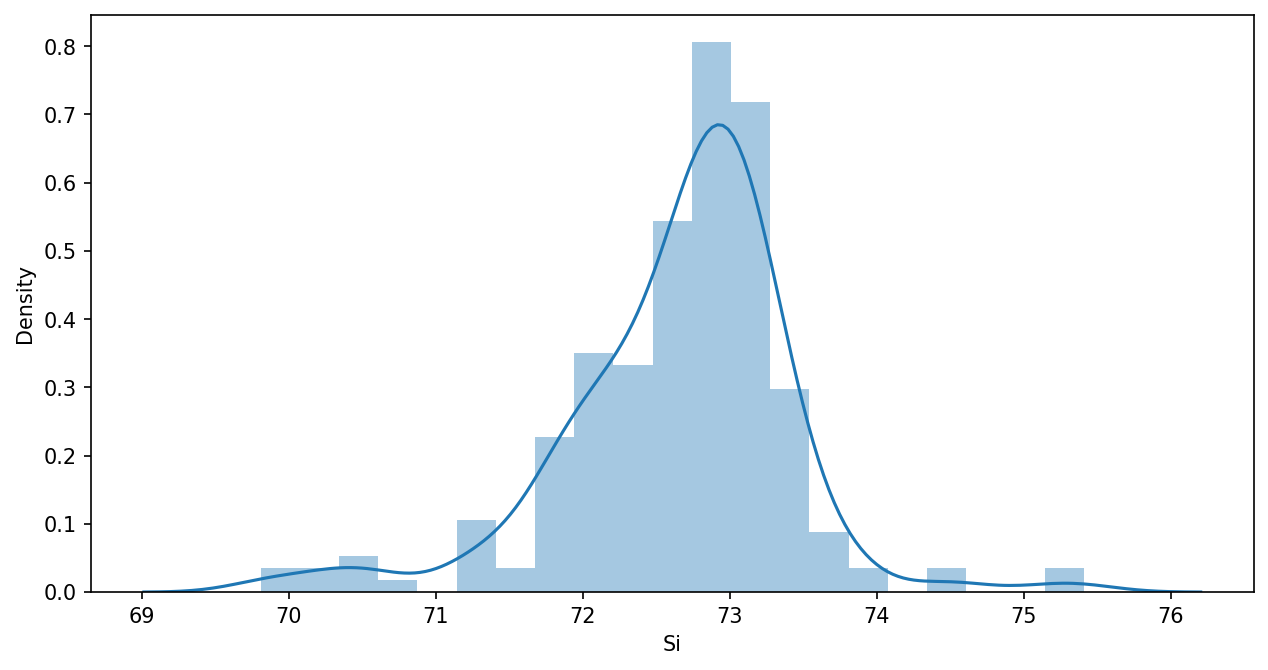

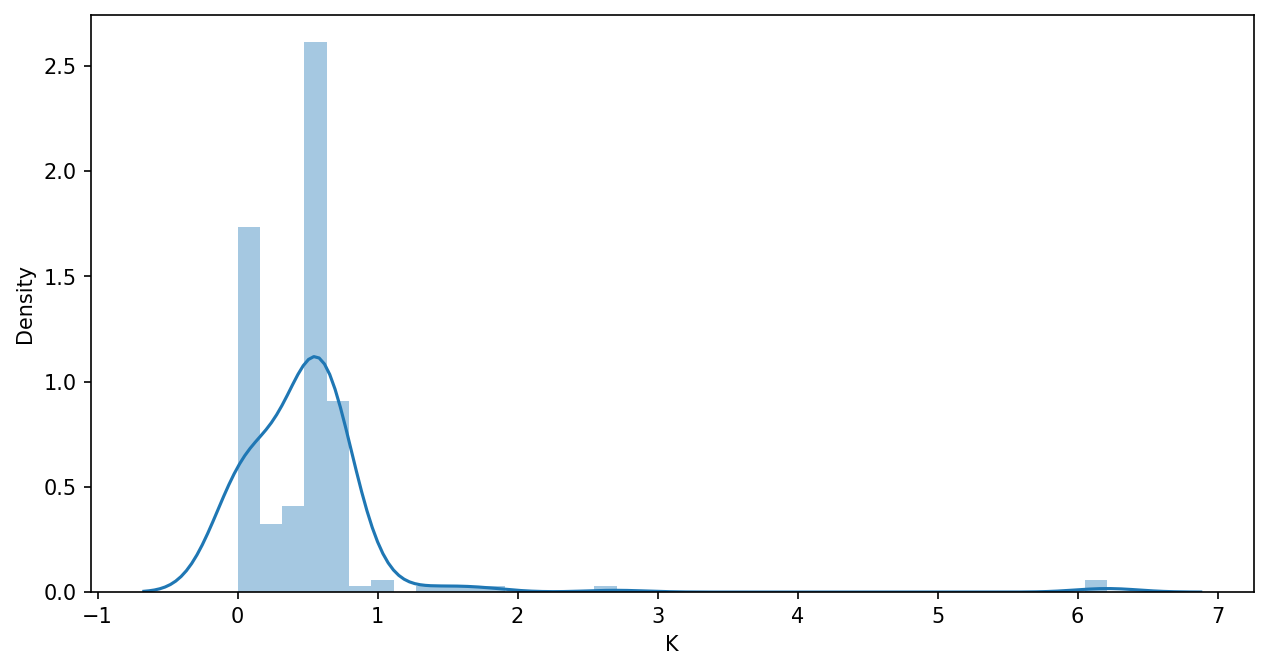

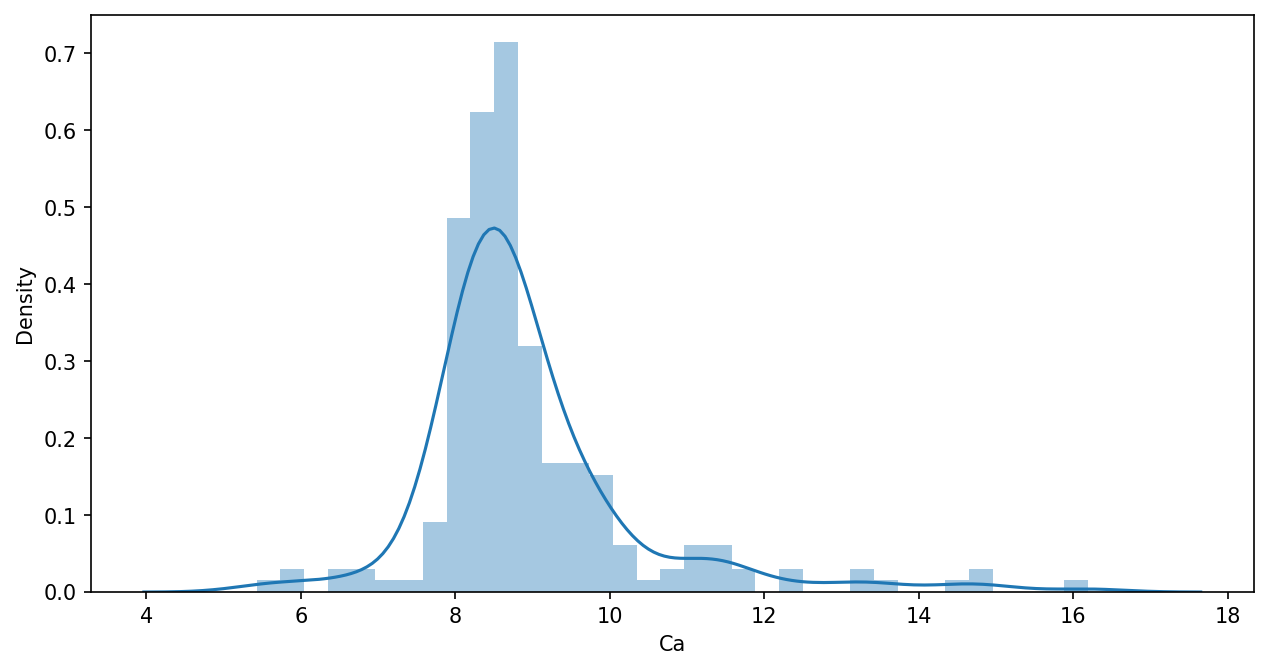

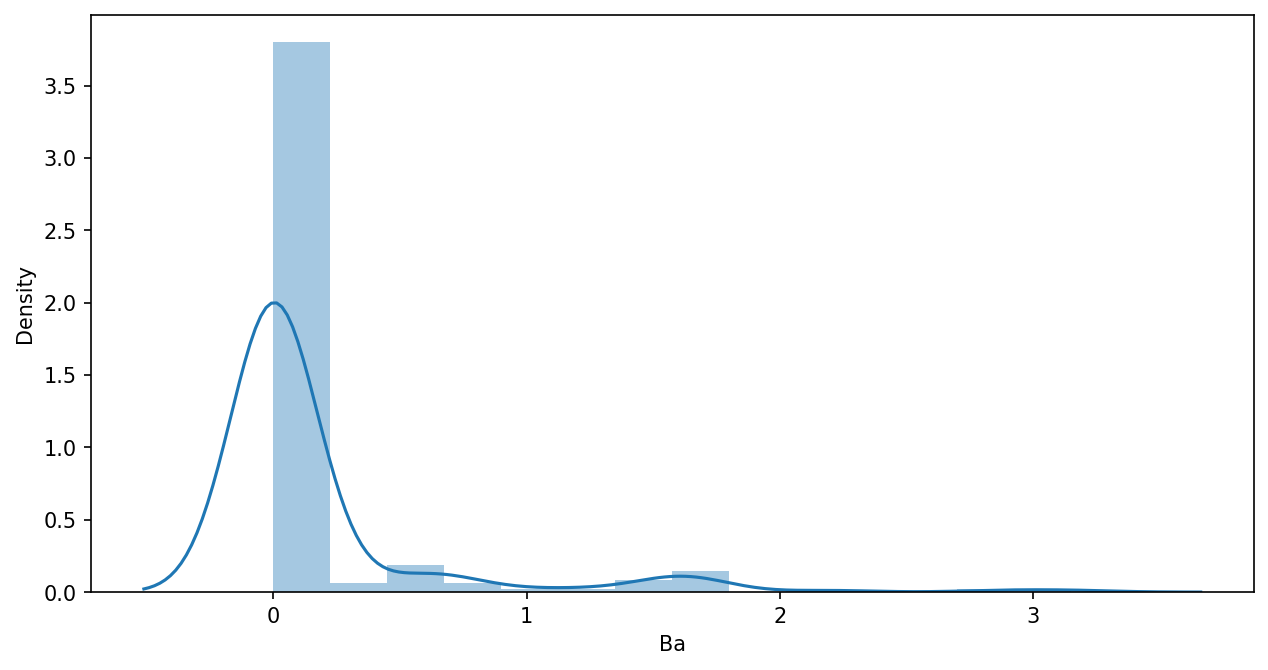

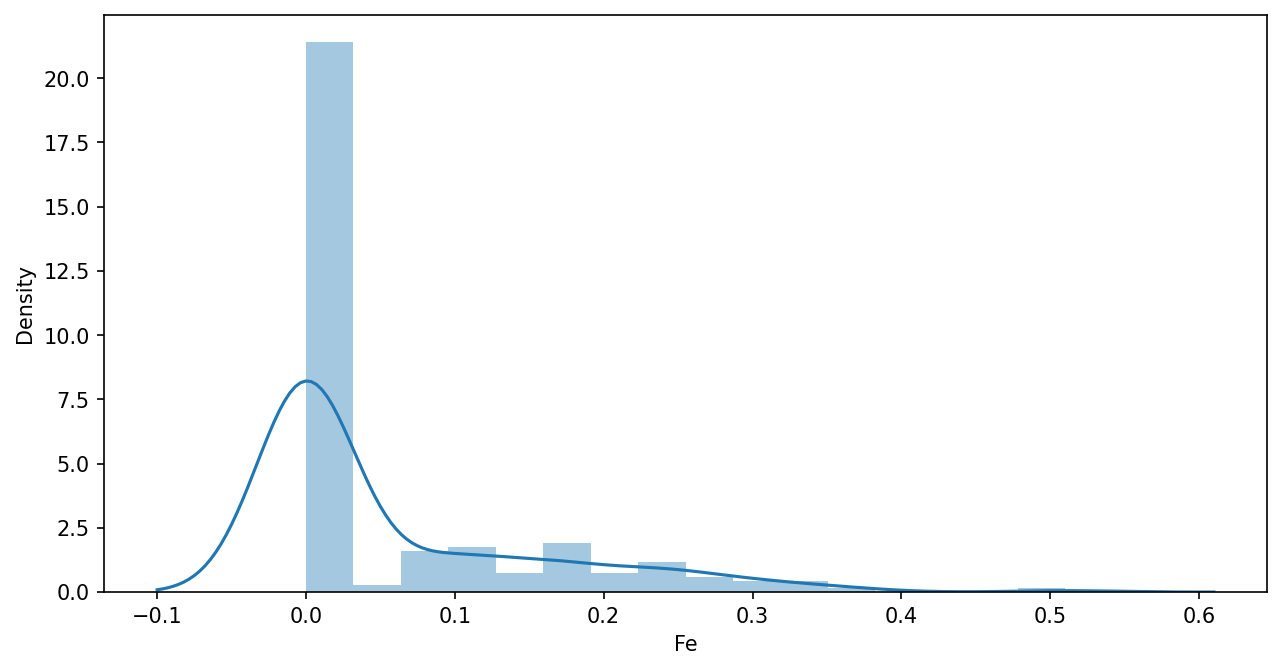

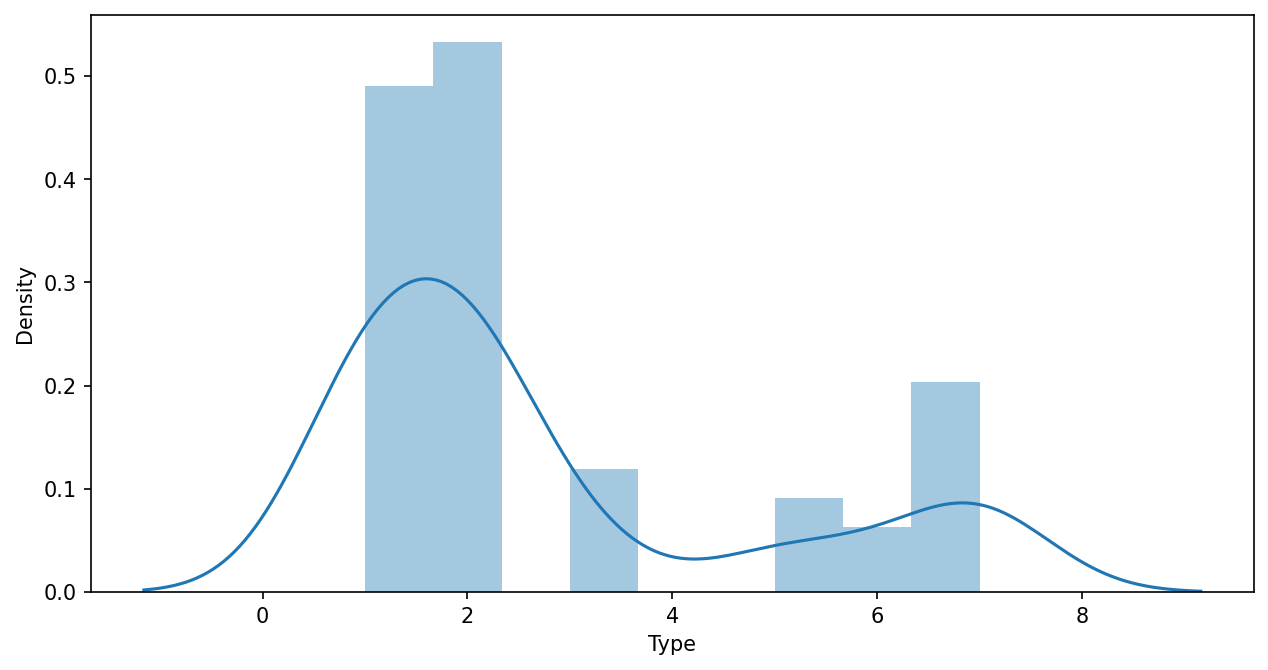

In [5]:

for column in df.columns:
    sns.distplot(df[column])
    plt.show()

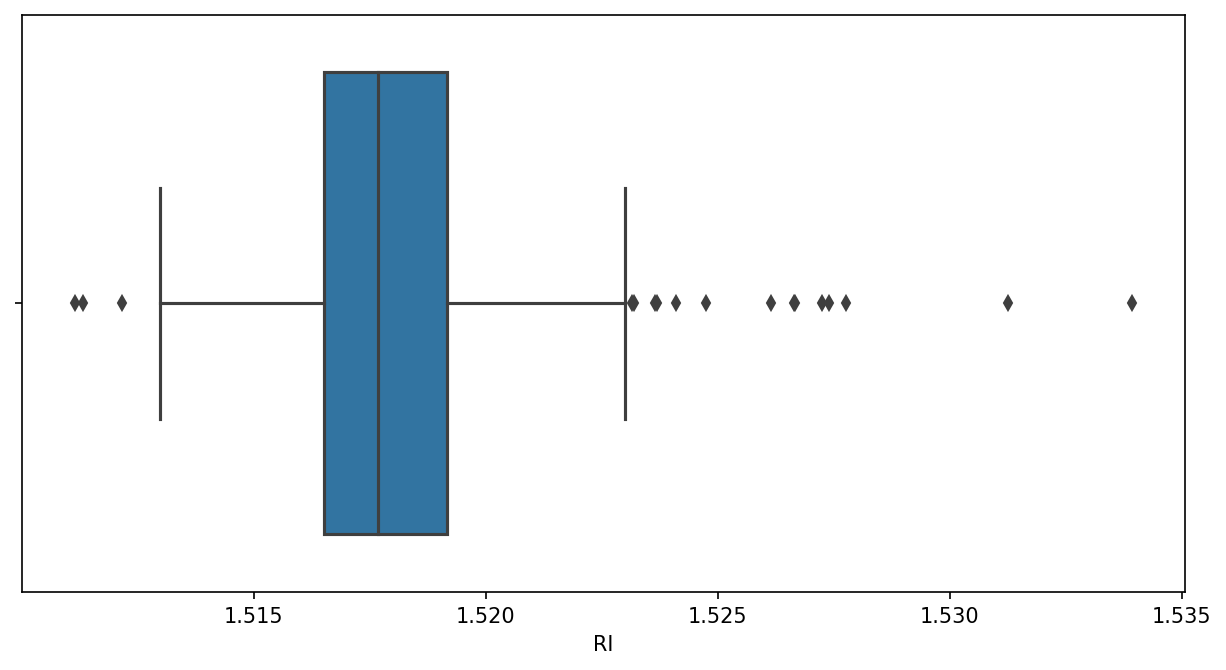

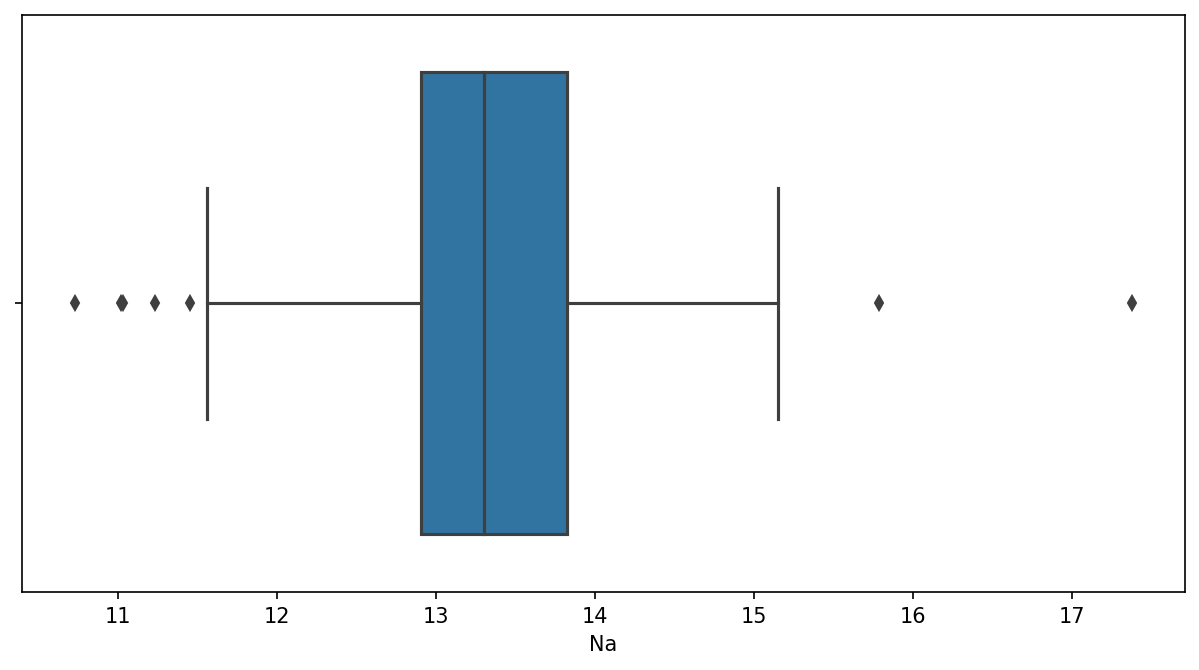

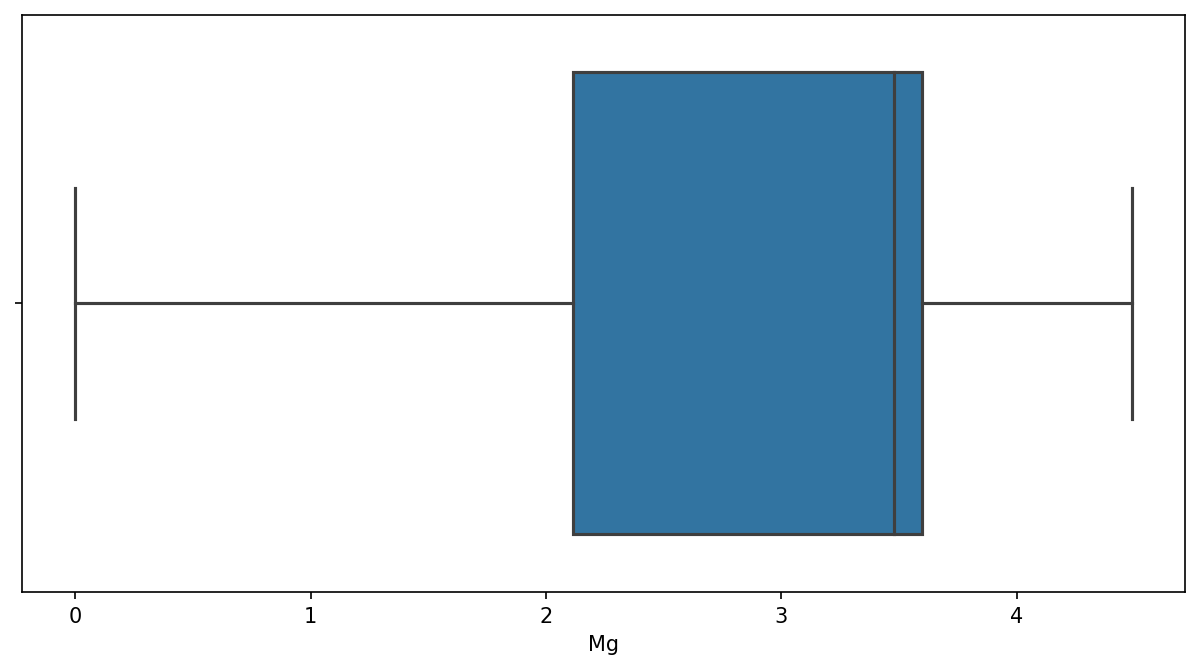

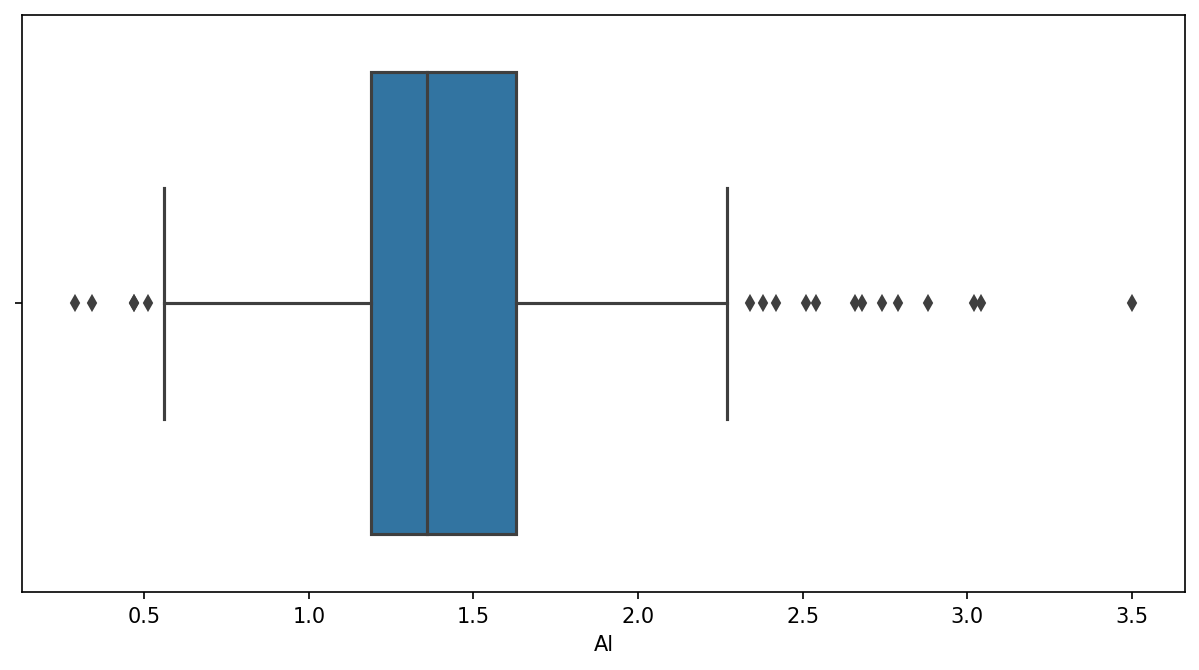

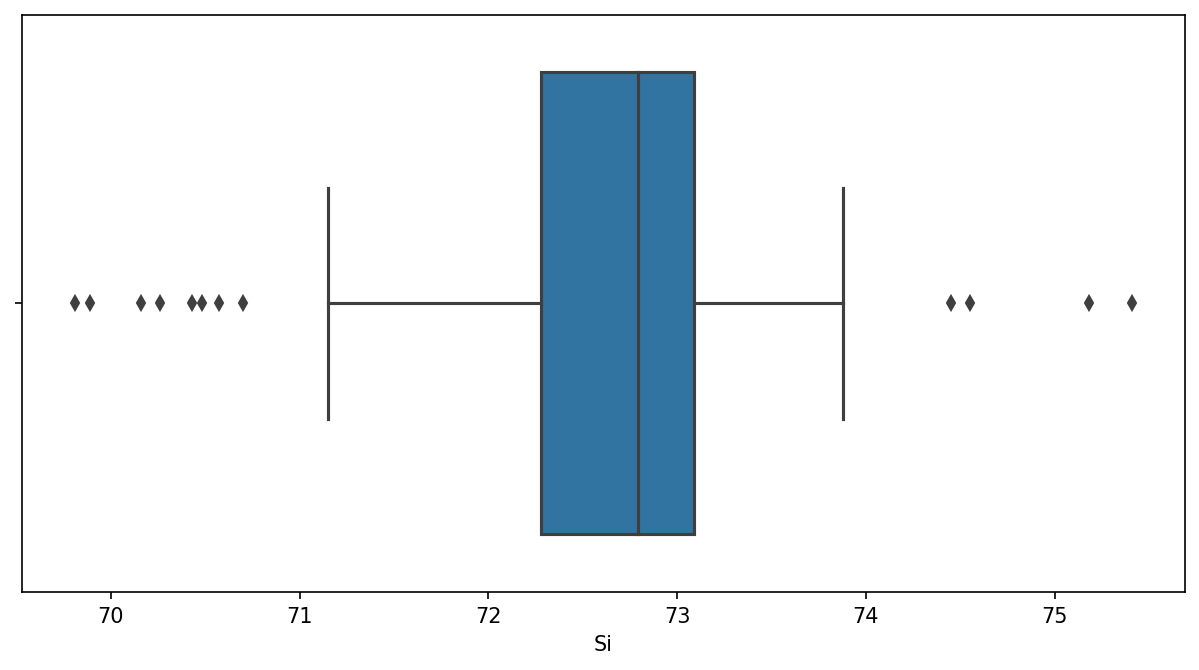

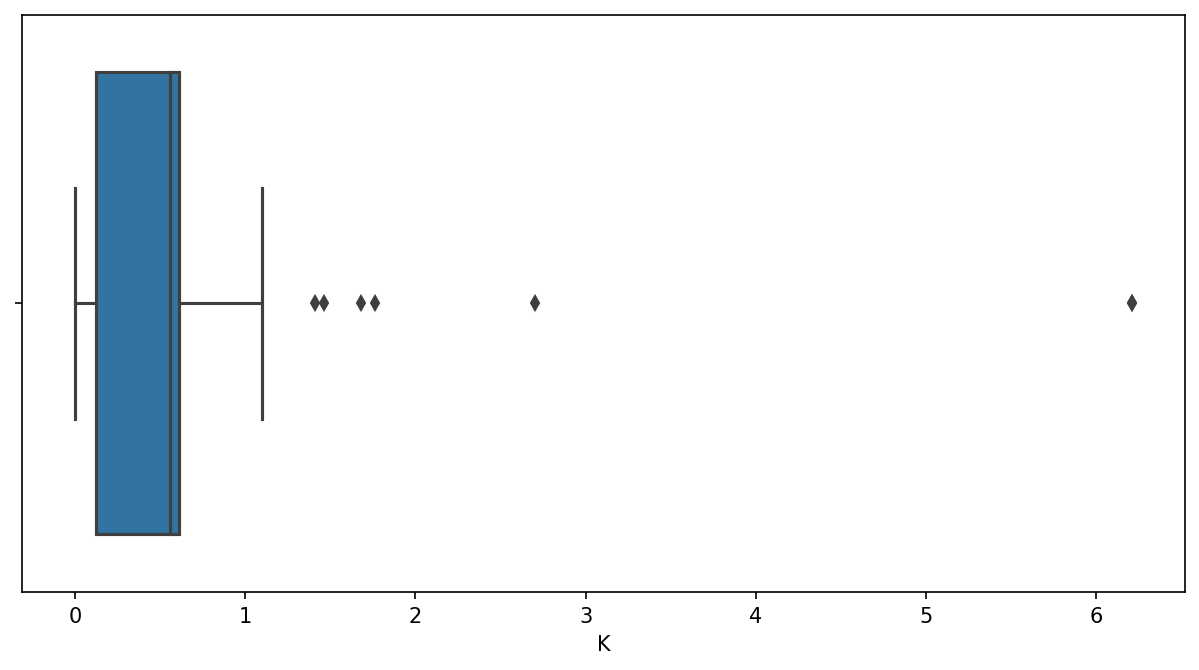

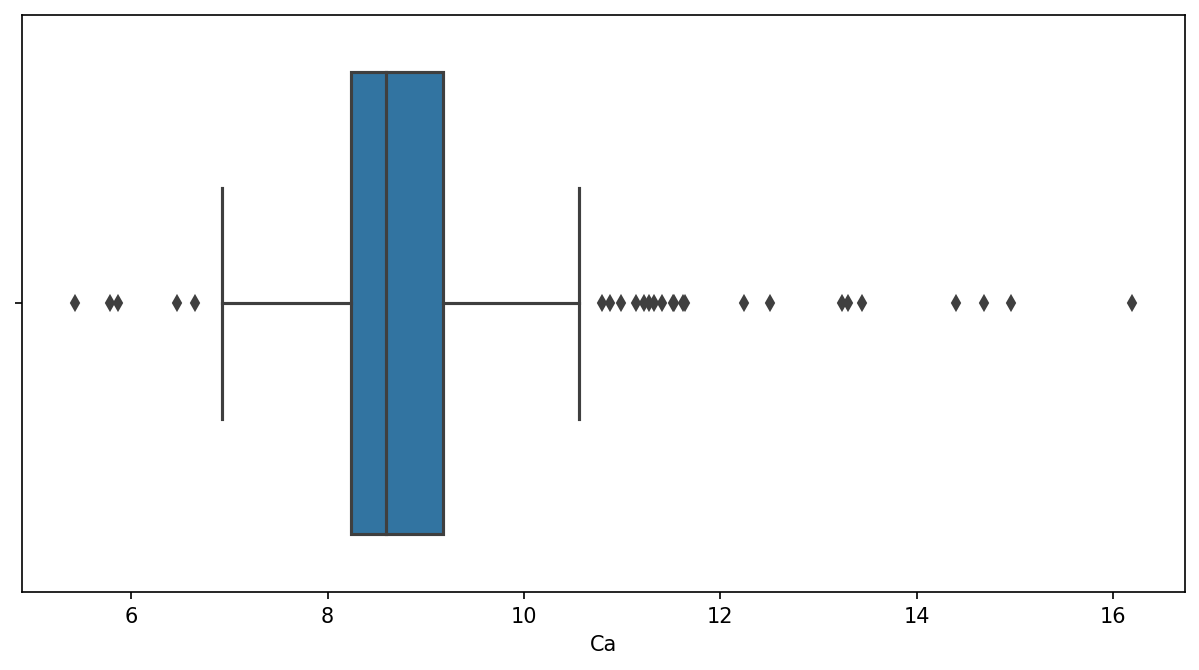

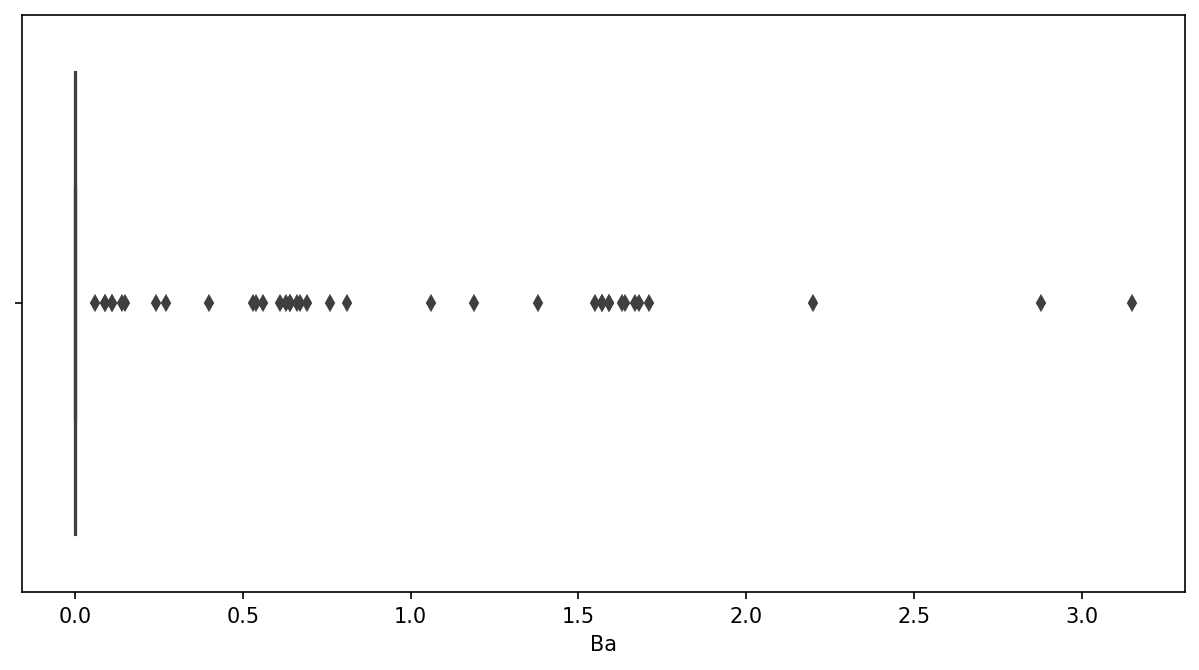

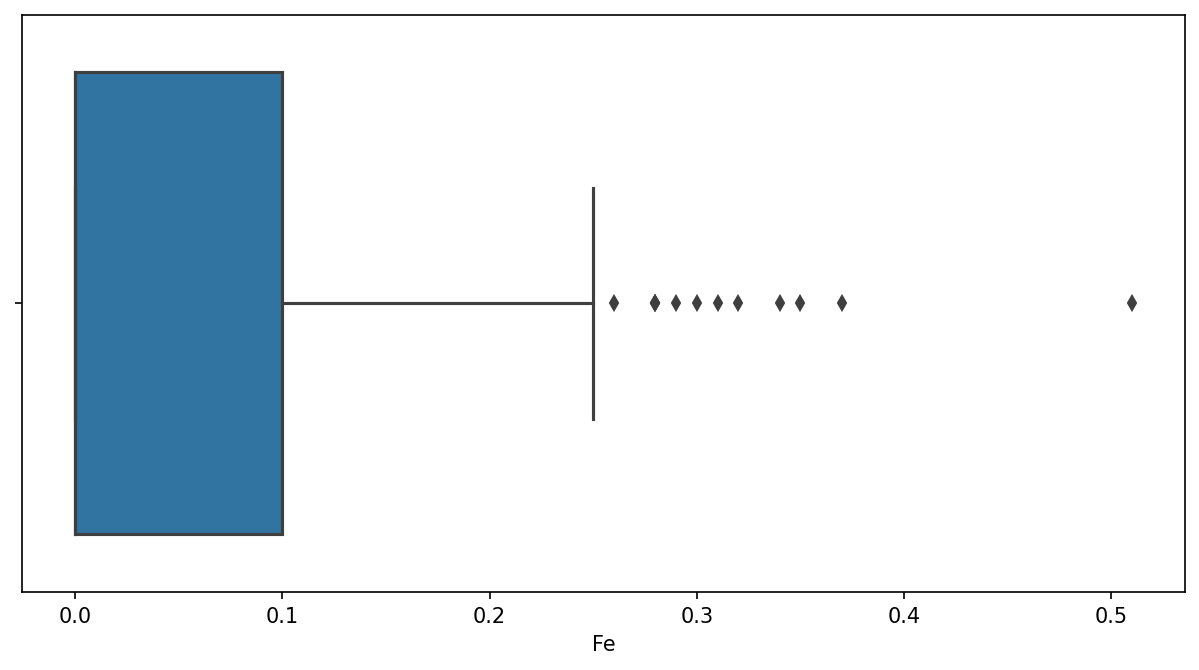

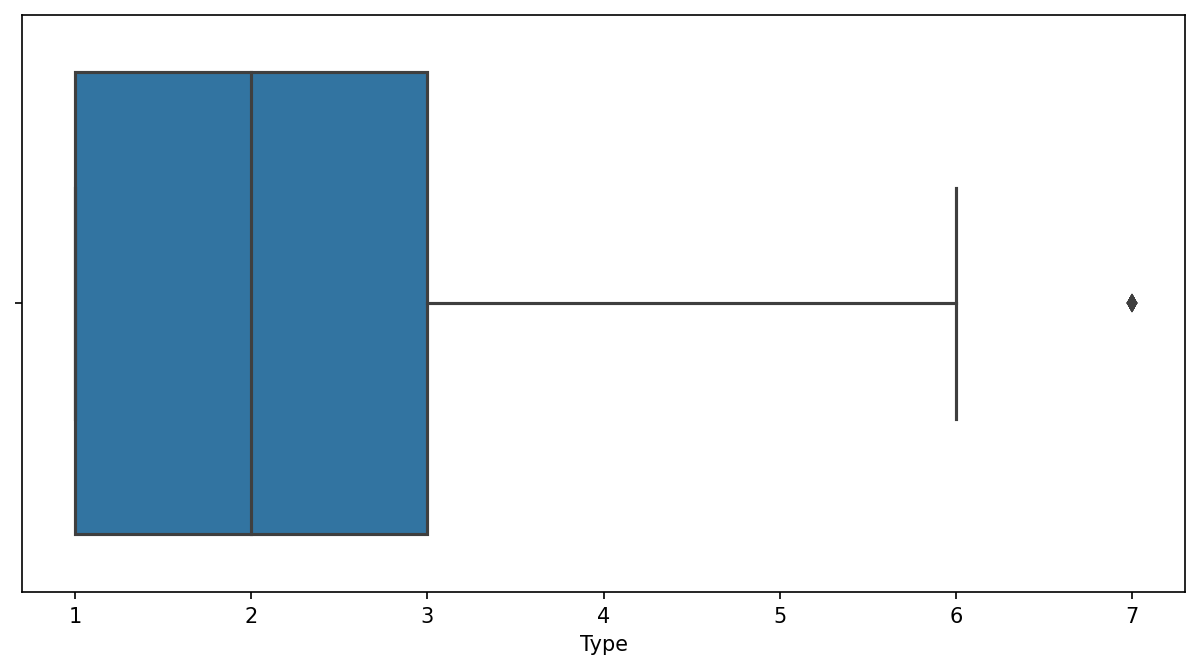

In [6]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.show()

In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

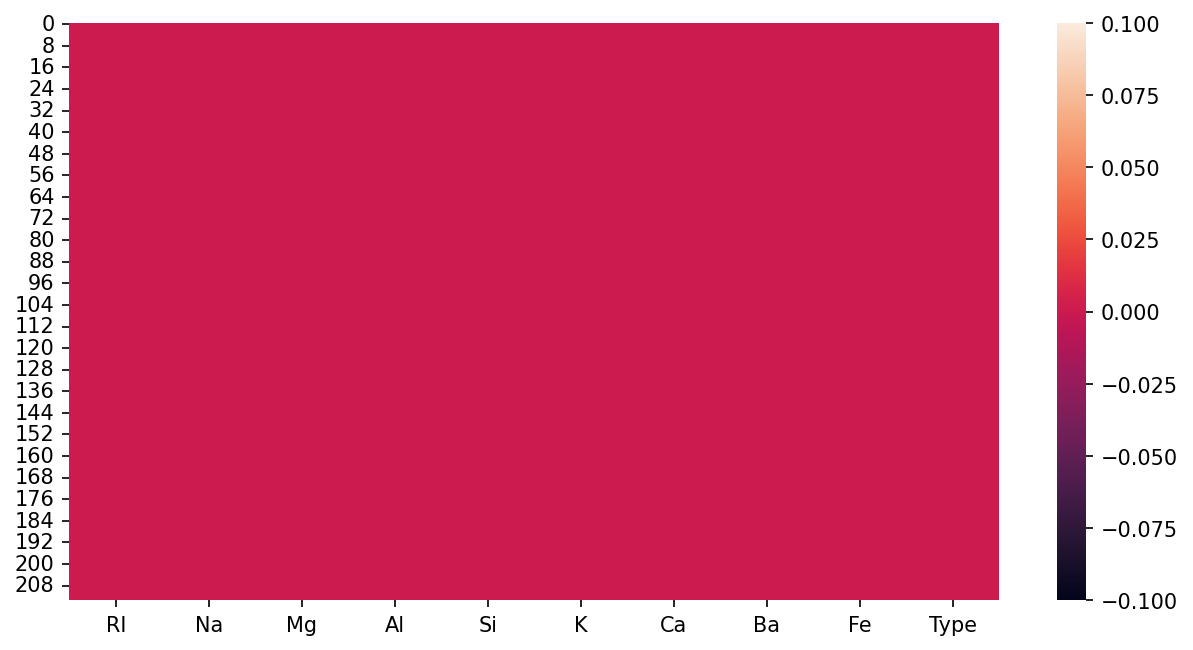

In [8]:
sns.heatmap(df.isna())

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


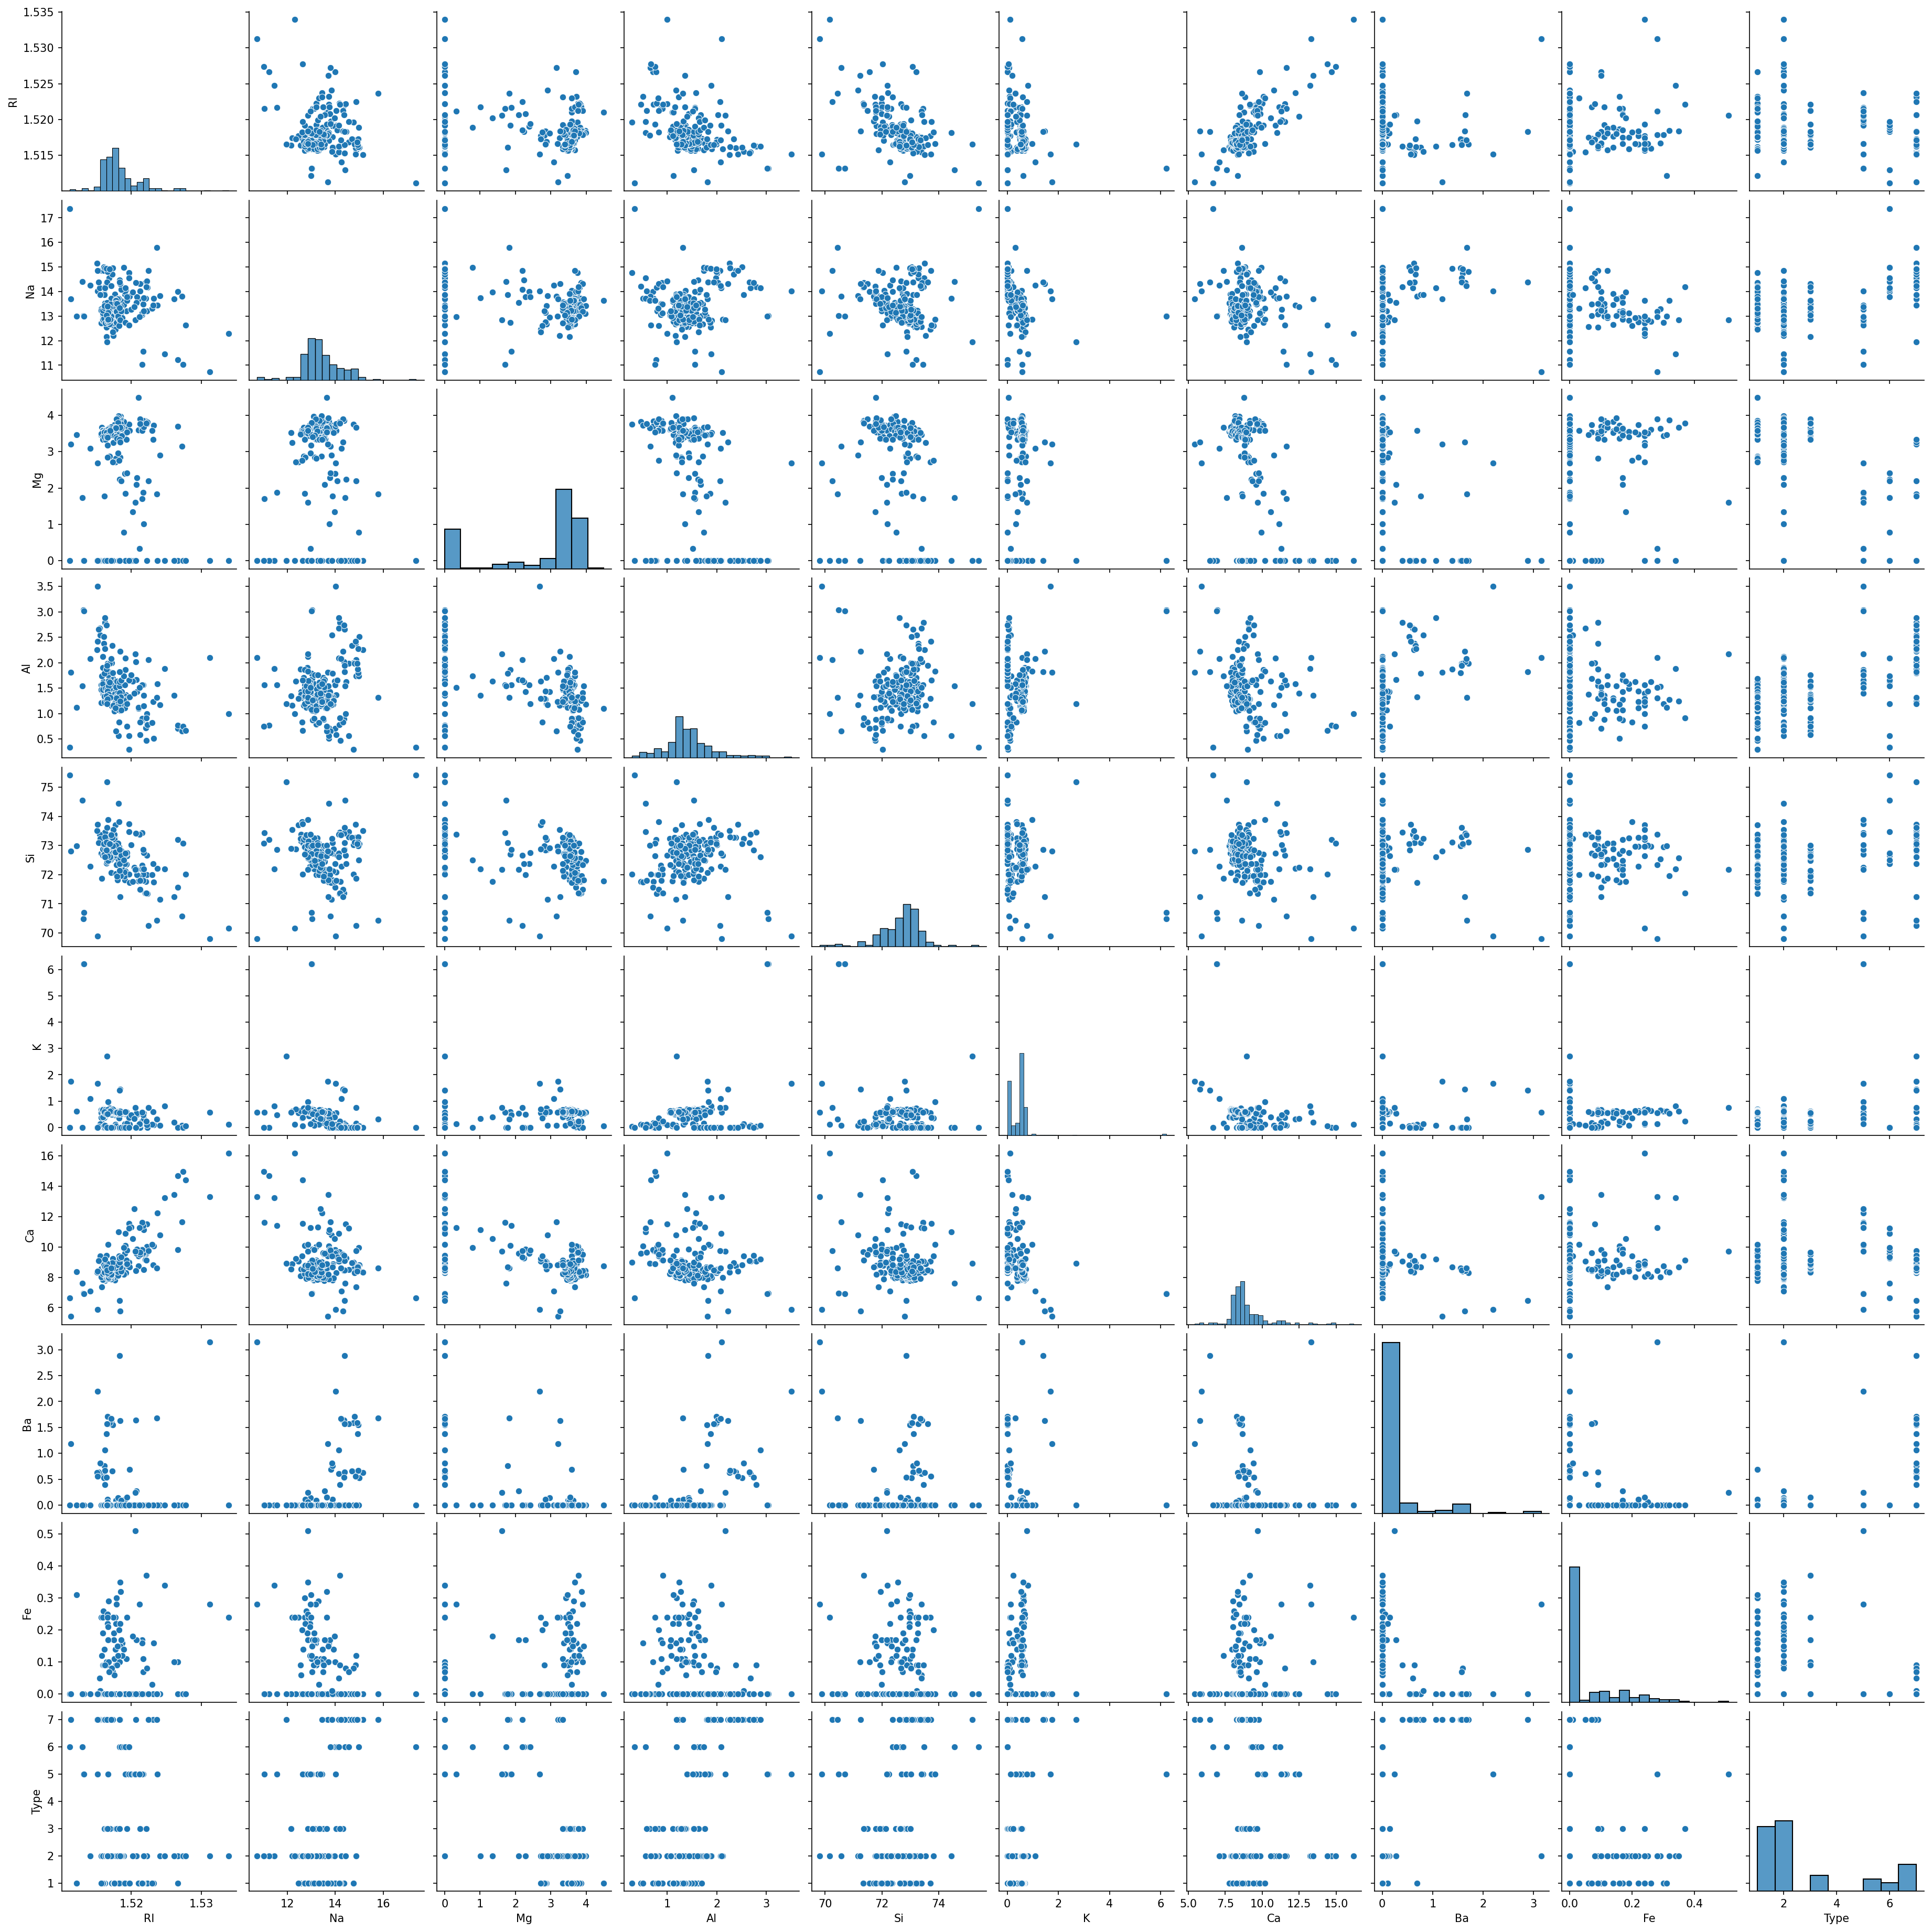

In [10]:
sns.pairplot(df)

<AxesSubplot:>

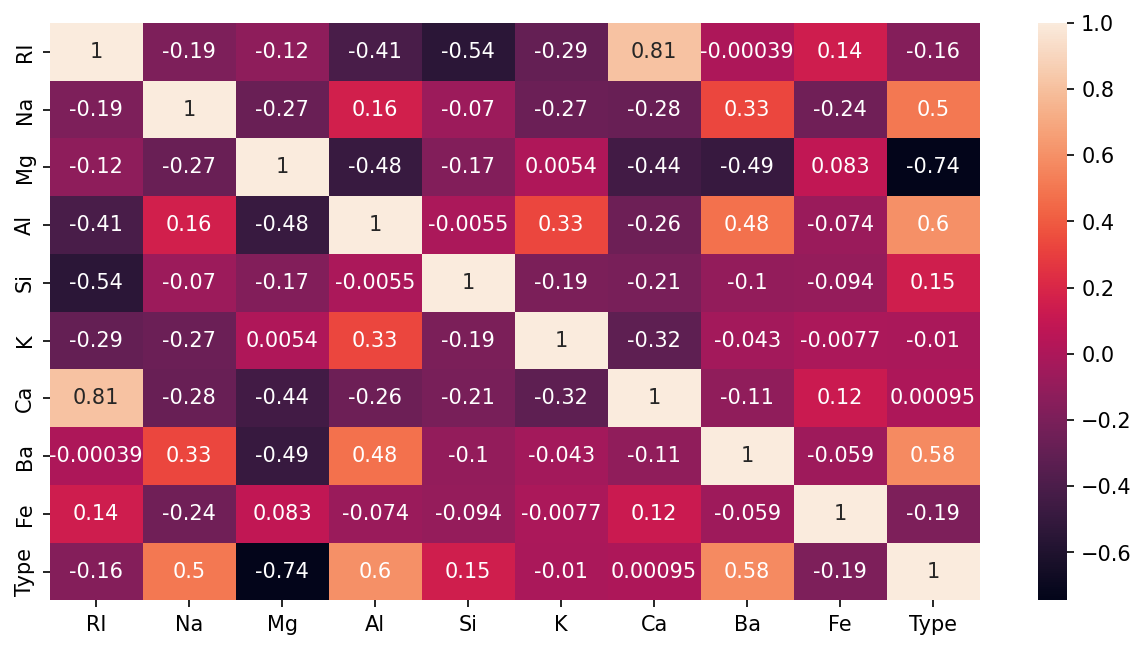

In [11]:
sns.heatmap(df.corr(),annot=True)

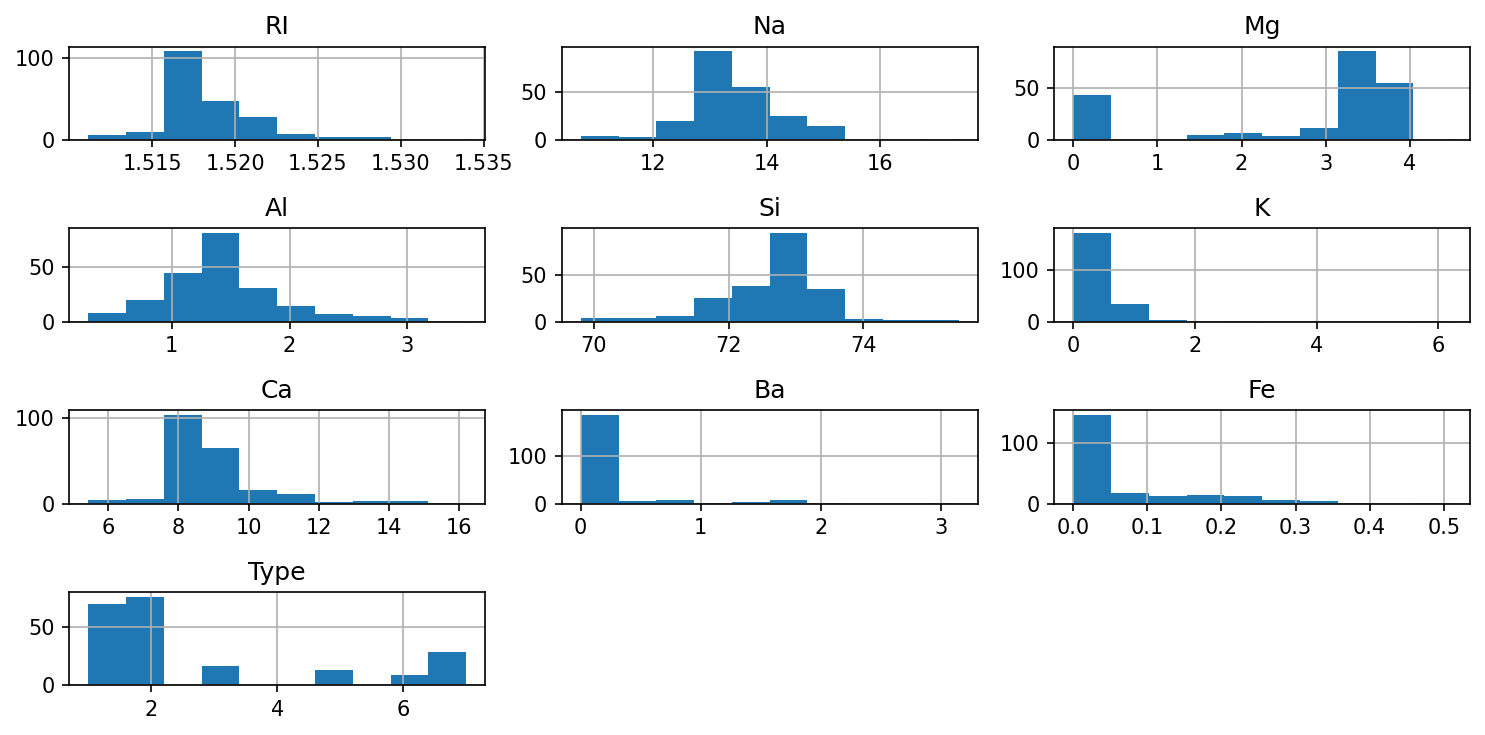

In [12]:

df.hist()
plt.tight_layout()

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain,ytrain)
    testac = model.score(xtest,ytest)
    
    print(f"Train AC {trainac}\nTest AC {testac}")

In [18]:
predict(KNeighborsClassifier())

Train AC 0.7875
Test AC 0.7222222222222222


This is an overfitted model hence we will do hyperparameter tuning to get a generalised model

# Hyperparameter Tuning for knn

In [19]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [20]:
trainac

[1.0,
 0.83125,
 0.83125,
 0.8,
 0.7875,
 0.7625,
 0.71875,
 0.71875,
 0.7125,
 0.68125,
 0.675,
 0.66875,
 0.68125,
 0.66875,
 0.65625,
 0.6375,
 0.65625,
 0.64375,
 0.6375,
 0.64375]

In [21]:
testac

[0.7222222222222222,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7037037037037037,
 0.7037037037037037]

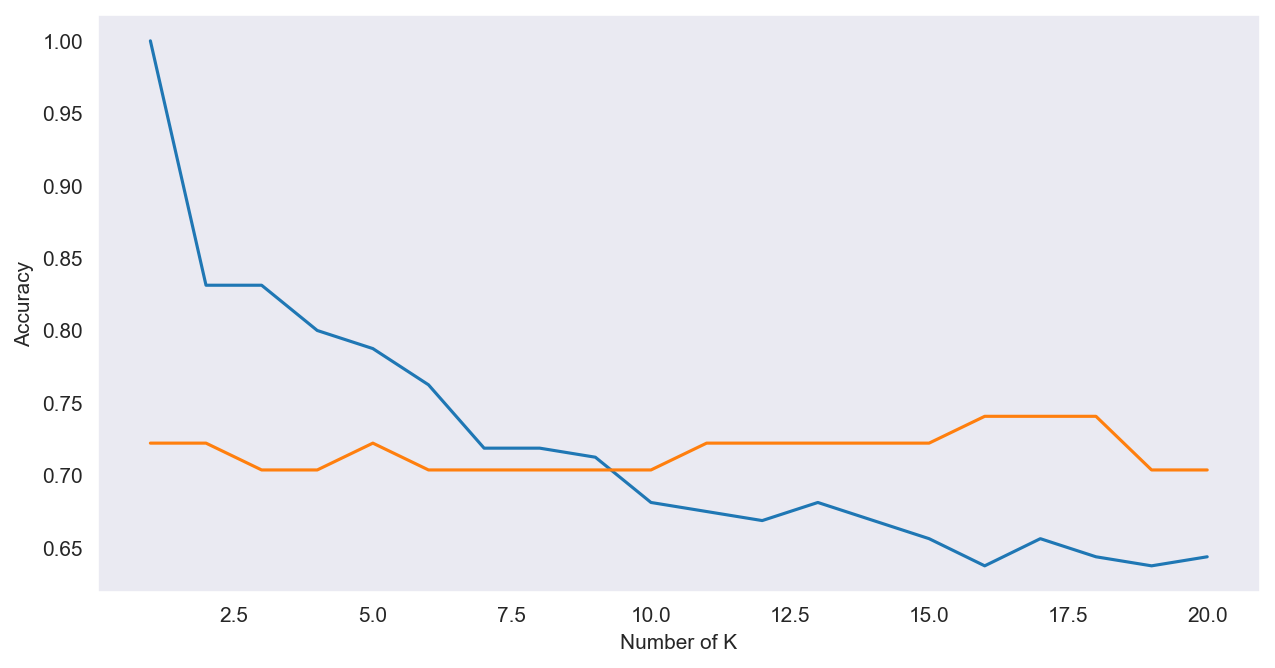

In [22]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [23]:
predict(KNeighborsClassifier(n_neighbors=9))

Train AC 0.7125
Test AC 0.7037037037037037


In [24]:
 ypred = knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.69      0.78      0.73        23
           2       0.60      0.75      0.67        16
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.70        54
   macro avg       0.72      0.76      0.73        54
weighted avg       0.62      0.70      0.66        54



here the Test and Train both accuracy are almost equal hence we will go with this model as the generalised model